# Master Colloqium - Character Recognition

In [1]:
#!pip install emnist
#!python -c "import emnist; emnist.ensure_cached_data()"

In [1]:
from emnist import extract_training_samples, extract_test_samples, list_datasets
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
import pickle as pk

## Data Sets

In [2]:
# Defining data sets
#digits only
dig_im_train, dig_y_train = extract_training_samples('digits')
dig_im_test, dig_y_test = extract_test_samples('digits')
#letters only
let_im_train, let_y_train = extract_training_samples('letters')
let_im_test, let_y_test = extract_test_samples('letters')
#balanced: 0-9, A-Z, a,b,d,e,f,g,h,n,q,r,t
bal_im_train, bal_y_train = extract_training_samples('balanced')
bal_im_test, bal_y_test = extract_test_samples('balanced')

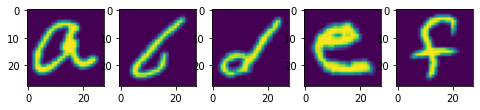

In [3]:

columns = 5
rows = 1
fig=plt.figure(figsize=(8, 8))
for i in range(36, columns*rows +36):
    img = bal_im_train[bal_y_train==i][np.random.randint(0,100)]
    fig.add_subplot(rows, columns, i-35)
    plt.imshow(img)
plt.show()
 

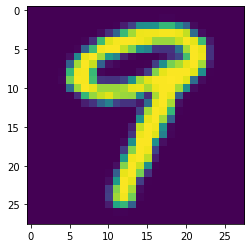

In [5]:
img = bal_im_train[bal_y_train==9][np.random.randint(0,100)]
plt.imshow(img)

Reshape images to vectors

In [4]:
#digit vectors
dig_X_train = dig_im_train[:].reshape(dig_im_train.shape[0],dig_im_train.shape[1]**2)
dig_X_test = dig_im_test[:].reshape(dig_im_test.shape[0],dig_im_test.shape[1]**2)
print(dig_X_train.shape, dig_X_test.shape)
#letter vectors
let_X_train = let_im_train[:].reshape(let_im_train.shape[0],let_im_train.shape[1]**2)
let_X_test = let_im_test[:].reshape(let_im_test.shape[0],let_im_test.shape[1]**2)
print(let_X_train.shape, let_X_test.shape)
#balanced vectors
bal_X_train = bal_im_train[:].reshape(bal_im_train.shape[0],bal_im_train.shape[1]**2)
bal_X_test = bal_im_test[:].reshape(bal_im_test.shape[0],bal_im_test.shape[1]**2)
print(bal_X_train.shape, bal_X_test.shape)

(240000, 784) (40000, 784)
(124800, 784) (20800, 784)
(112800, 784) (18800, 784)


## Classifiers

### Digits

In [ ]:
# MLP plus HPO with GridSearch
pipeline = Pipeline([('clf',MLPClassifier())])
# Define hyperparameter grid
param_grid = {'clf__hidden_layer_sizes':[(i,) for i in [10, 1000]]}
dig_MLP_clf = GridSearchCV(
    pipeline, param_grid,verbose=1, cv = 2).fit(dig_X_train,dig_y_train)

with open(f'dig_MLP_clf_1000.pickle', 'wb') as f:
    pk.dump(dig_MLP_clf,f)

print(dig_MLP_clf.best_params_)

Fitting 2 folds for each of 2 candidates, totalling 4 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\nelso\Anaconda3\envs\ML_BHT\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:587: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [5]:
# KNN plus HPO with GridSearch
pipeline = Pipeline([('clf',KNeighborsClassifier())])
# Define hyperparameter grid
param_grid = {'clf__n_neighbors':range(1,5)}
#GridSearchCV to perform HPO
dig_KNN_clf = GridSearchCV(
    pipeline, param_grid,verbose=3, cv= 2).fit(dig_X_train[:20000], dig_y_train[:20000])

with open(f'dig_KNN_clf.pickle', 'wb') as f:
    pk.dump(dig_KNN_clf,f)
    
print(dig_KNN_clf.best_params_)

Fitting 2 folds for each of 4 candidates, totalling 8 fits
[CV] clf__n_neighbors=1 ..............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................. clf__n_neighbors=1, score=0.954, total= 3.1min
[CV] clf__n_neighbors=1 ..............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.1min remaining:    0.0s


[CV] .................. clf__n_neighbors=1, score=0.952, total= 3.2min
[CV] clf__n_neighbors=2 ..............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  6.3min remaining:    0.0s


[CV] .................. clf__n_neighbors=2, score=0.941, total= 3.3min
[CV] clf__n_neighbors=2 ..............................................
[CV] .................. clf__n_neighbors=2, score=0.938, total= 3.2min
[CV] clf__n_neighbors=3 ..............................................
[CV] .................. clf__n_neighbors=3, score=0.951, total= 3.2min
[CV] clf__n_neighbors=3 ..............................................
[CV] .................. clf__n_neighbors=3, score=0.952, total= 3.2min
[CV] clf__n_neighbors=4 ..............................................
[CV] .................. clf__n_neighbors=4, score=0.946, total= 3.2min
[CV] clf__n_neighbors=4 ..............................................
[CV] .................. clf__n_neighbors=4, score=0.949, total= 3.1min


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed: 25.4min finished


{'clf__n_neighbors': 1}


***MLP - Classification Report - Digits***

In [ ]:
dig_y_pred = dig_MLP_clf.predict(dig_X_test)
print(classification_report(dig_y_test, dig_y_pred))
print(dig_MLP_clf.best_params_)

***KNN - Classification Report - Digits***

In [6]:
with open('dig_KNN_clf.pickle', 'rb') as f:
    dig_KNN_clf = pk.load(f)
dig_y_pred = dig_KNN_clf.predict(dig_X_test)
print(classification_report(dig_y_test, dig_y_pred))
print(dig_KNN_clf.best_params_)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      4000
           1       0.94      0.99      0.97      4000
           2       0.98      0.96      0.97      4000
           3       0.94      0.96      0.95      4000
           4       0.97      0.95      0.96      4000
           5       0.97      0.96      0.96      4000
           6       0.98      0.98      0.98      4000
           7       0.95      0.97      0.96      4000
           8       0.98      0.91      0.94      4000
           9       0.94      0.94      0.94      4000

    accuracy                           0.96     40000
   macro avg       0.96      0.96      0.96     40000
weighted avg       0.96      0.96      0.96     40000

{'clf__n_neighbors': 1}


### Letters

In [ ]:
# MLP plus HPO with GridSearch
pipeline = Pipeline([('clf',MLPClassifier())])
# Define hyperparameter grid
param_grid = {'clf__hidden_layer_sizes':[(i,) for i in [1, 2000]]}
let_MLP_clf = GridSearchCV(
    pipeline, param_grid,verbose=1, cv = 2).fit(let_X_train,let_y_train)

In [ ]:
print(let_MLP_clf.best_params_)

In [ ]:
with open(f'let_MLP_clf_2000.pickle', 'wb') as f:
    pk.dump(let_MLP_clf,f)

In [12]:
# KNN plus HPO with GridSearch
pipeline = Pipeline([('clf',KNeighborsClassifier())])
# Define hyperparameter grid
param_grid = {'clf__n_neighbors':range(1,10)}
#GridSearchCV to perform HPO pipeline
let_KNN_clf = GridSearchCV(pipeline, param_grid,verbose=3, cv = 2).fit(let_X_train[:20000], let_y_train[:20000])
with open(f'let_KNN_clf.pickle', 'wb') as f:
    pk.dump(let_KNN_clf,f)
print(let_KNN_clf.best_params_)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] clf__n_neighbors=1 ..............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................. clf__n_neighbors=1, score=0.768, total= 3.2min
[CV] clf__n_neighbors=1 ..............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.2min remaining:    0.0s


[CV] .................. clf__n_neighbors=1, score=0.768, total= 3.2min
[CV] clf__n_neighbors=2 ..............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  6.3min remaining:    0.0s


[CV] .................. clf__n_neighbors=2, score=0.752, total= 3.2min
[CV] clf__n_neighbors=2 ..............................................
[CV] .................. clf__n_neighbors=2, score=0.750, total= 3.2min
[CV] clf__n_neighbors=3 ..............................................
[CV] .................. clf__n_neighbors=3, score=0.772, total= 3.1min
[CV] clf__n_neighbors=3 ..............................................
[CV] .................. clf__n_neighbors=3, score=0.770, total= 3.1min
[CV] clf__n_neighbors=4 ..............................................
[CV] .................. clf__n_neighbors=4, score=0.771, total= 3.1min
[CV] clf__n_neighbors=4 ..............................................
[CV] .................. clf__n_neighbors=4, score=0.769, total= 3.1min
[CV] clf__n_neighbors=5 ..............................................
[CV] .................. clf__n_neighbors=5, score=0.768, total= 3.1min
[CV] clf__n_neighbors=5 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed: 56.5min finished


{'clf__n_neighbors': 3}


***MLP - Classification Report - Letters***

In [ ]:
with open('let_MLP_clf.pickle', 'rb') as f:
    let_MLP_clf = pk.load(f)
let_y_pred = let_MLP_clf.predict(let_X_test)
print(classification_report(let_y_test, let_y_pred))
print(let_MLP_clf.best_params_)

***KNN - Classification Report - Letters***

In [13]:
with open('let_KNN_clf.pickle', 'rb') as f:
    let_KNN_clf = pk.load(f)
let_y_pred = let_KNN_clf.predict(let_X_test)
print(classification_report(let_y_test, let_y_pred))
print(let_KNN_clf.best_params_)

              precision    recall  f1-score   support

           1       0.71      0.80      0.75       800
           2       0.85      0.73      0.79       800
           3       0.75      0.93      0.83       800
           4       0.88      0.76      0.81       800
           5       0.83      0.83      0.83       800
           6       0.80      0.76      0.78       800
           7       0.76      0.57      0.65       800
           8       0.76      0.83      0.79       800
           9       0.54      0.66      0.59       800
          10       0.80      0.83      0.81       800
          11       0.88      0.77      0.82       800
          12       0.50      0.70      0.59       800
          13       0.95      0.93      0.94       800
          14       0.81      0.86      0.83       800
          15       0.75      0.96      0.84       800
          16       0.82      0.85      0.83       800
          17       0.77      0.51      0.62       800
          18       0.82    

## Balanced Dataset

In [ ]:
# MLP plus HPO with GridSearch
pipeline = Pipeline([('clf',MLPClassifier())])
# Define hyperparameter grid
param_grid = {'clf__hidden_layer_sizes':[(i,) for i in [1, 2000]]}
bal_MLP_clf = GridSearchCV(
    pipeline, param_grid,verbose=1, cv = 2).fit(bal_X_train,bal_y_train)

with open(f'bal_MLP_clf_2000.pickle', 'wb') as f:
    pk.dump(bal_MLP_clf,f)

print(bal_MLP_clf.best_params_)

In [10]:
# KNN plus HPO with GridSearch
pipeline = Pipeline([('clf',KNeighborsClassifier())])
# Define hyperparameter grid
param_grid = {'clf__n_neighbors':range(1,10)}
#GridSearchCV to perform HPO pipeline
bal_KNN_clf = GridSearchCV(pipeline, param_grid,verbose=3, cv = 2).fit(bal_X_train[:20000], bal_y_train[:20000])

with open(f'bal_KNN_clf.pickle', 'wb') as f:
    pk.dump(bal_KNN_clf,f)
    
print(bal_KNN_clf.best_params_)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] clf__n_neighbors=1 ..............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................. clf__n_neighbors=1, score=0.668, total= 3.2min
[CV] clf__n_neighbors=1 ..............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.2min remaining:    0.0s


[CV] .................. clf__n_neighbors=1, score=0.666, total= 3.1min
[CV] clf__n_neighbors=2 ..............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  6.4min remaining:    0.0s


[CV] .................. clf__n_neighbors=2, score=0.648, total= 3.2min
[CV] clf__n_neighbors=2 ..............................................
[CV] .................. clf__n_neighbors=2, score=0.646, total= 3.2min
[CV] clf__n_neighbors=3 ..............................................
[CV] .................. clf__n_neighbors=3, score=0.664, total= 3.1min
[CV] clf__n_neighbors=3 ..............................................
[CV] .................. clf__n_neighbors=3, score=0.667, total= 3.4min
[CV] clf__n_neighbors=4 ..............................................
[CV] .................. clf__n_neighbors=4, score=0.677, total= 3.2min
[CV] clf__n_neighbors=4 ..............................................
[CV] .................. clf__n_neighbors=4, score=0.669, total= 3.2min
[CV] clf__n_neighbors=5 ..............................................
[CV] .................. clf__n_neighbors=5, score=0.675, total= 3.2min
[CV] clf__n_neighbors=5 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed: 57.4min finished


{'clf__n_neighbors': 6}


***MLP - Classification Report - Balanced***

In [ ]:
with open('bal_MLP_clf.pickle', 'rb') as f:
    bal_MLP_clf = pk.load(f)
bal_y_pred = bal_MLP_clf.predict(bal_X_test)
print(classification_report(bal_y_test, bal_y_pred))
print(bal_MLP_clf.best_params_)

***KNN - Classification Report - Balanced***

In [5]:
with open('bal_KNN_clf.pickle', 'rb') as f:
    bal_KNN_clf = pk.load(f)
bal_y_pred = bal_KNN_clf.predict(bal_X_test)
print(classification_report(bal_y_test, bal_y_pred))
print(bal_KNN_clf.best_params_)

              precision    recall  f1-score   support

           0       0.43      0.71      0.53       400
           1       0.31      0.69      0.43       400
           2       0.77      0.77      0.77       400
           3       0.73      0.94      0.82       400
           4       0.69      0.74      0.71       400
           5       0.77      0.69      0.73       400
           6       0.78      0.89      0.83       400
           7       0.78      0.95      0.86       400
           8       0.79      0.76      0.77       400
           9       0.48      0.77      0.59       400
          10       0.83      0.75      0.79       400
          11       0.86      0.54      0.66       400
          12       0.67      0.90      0.76       400
          13       0.90      0.62      0.73       400
          14       0.90      0.80      0.85       400
          15       0.51      0.50      0.51       400
          16       0.89      0.68      0.77       400
          17       0.84    